In [1]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv('data/data.csv', index_col=False,)

In [2]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [3]:
# Id column is redundant and not useful, we want to drop it
data.drop('id', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
data.shape

(569, 31)

In [5]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

From the above results, from the 32, variables,column id number 1 is an integer, diagnosis 569 non-null object. and rest are float. More on [python variables](https://www.tutorialspoint.com/python/python_variable_types.htm)

In [ ]:
#check for missing variables
#data.isnull().any()

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them.



In [8]:
#save the cleaner version of dataframe for future analyis
data.to_csv('data/clean-data.csv')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization


plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [10]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head(2)

In [11]:
#basic descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [13]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [14]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


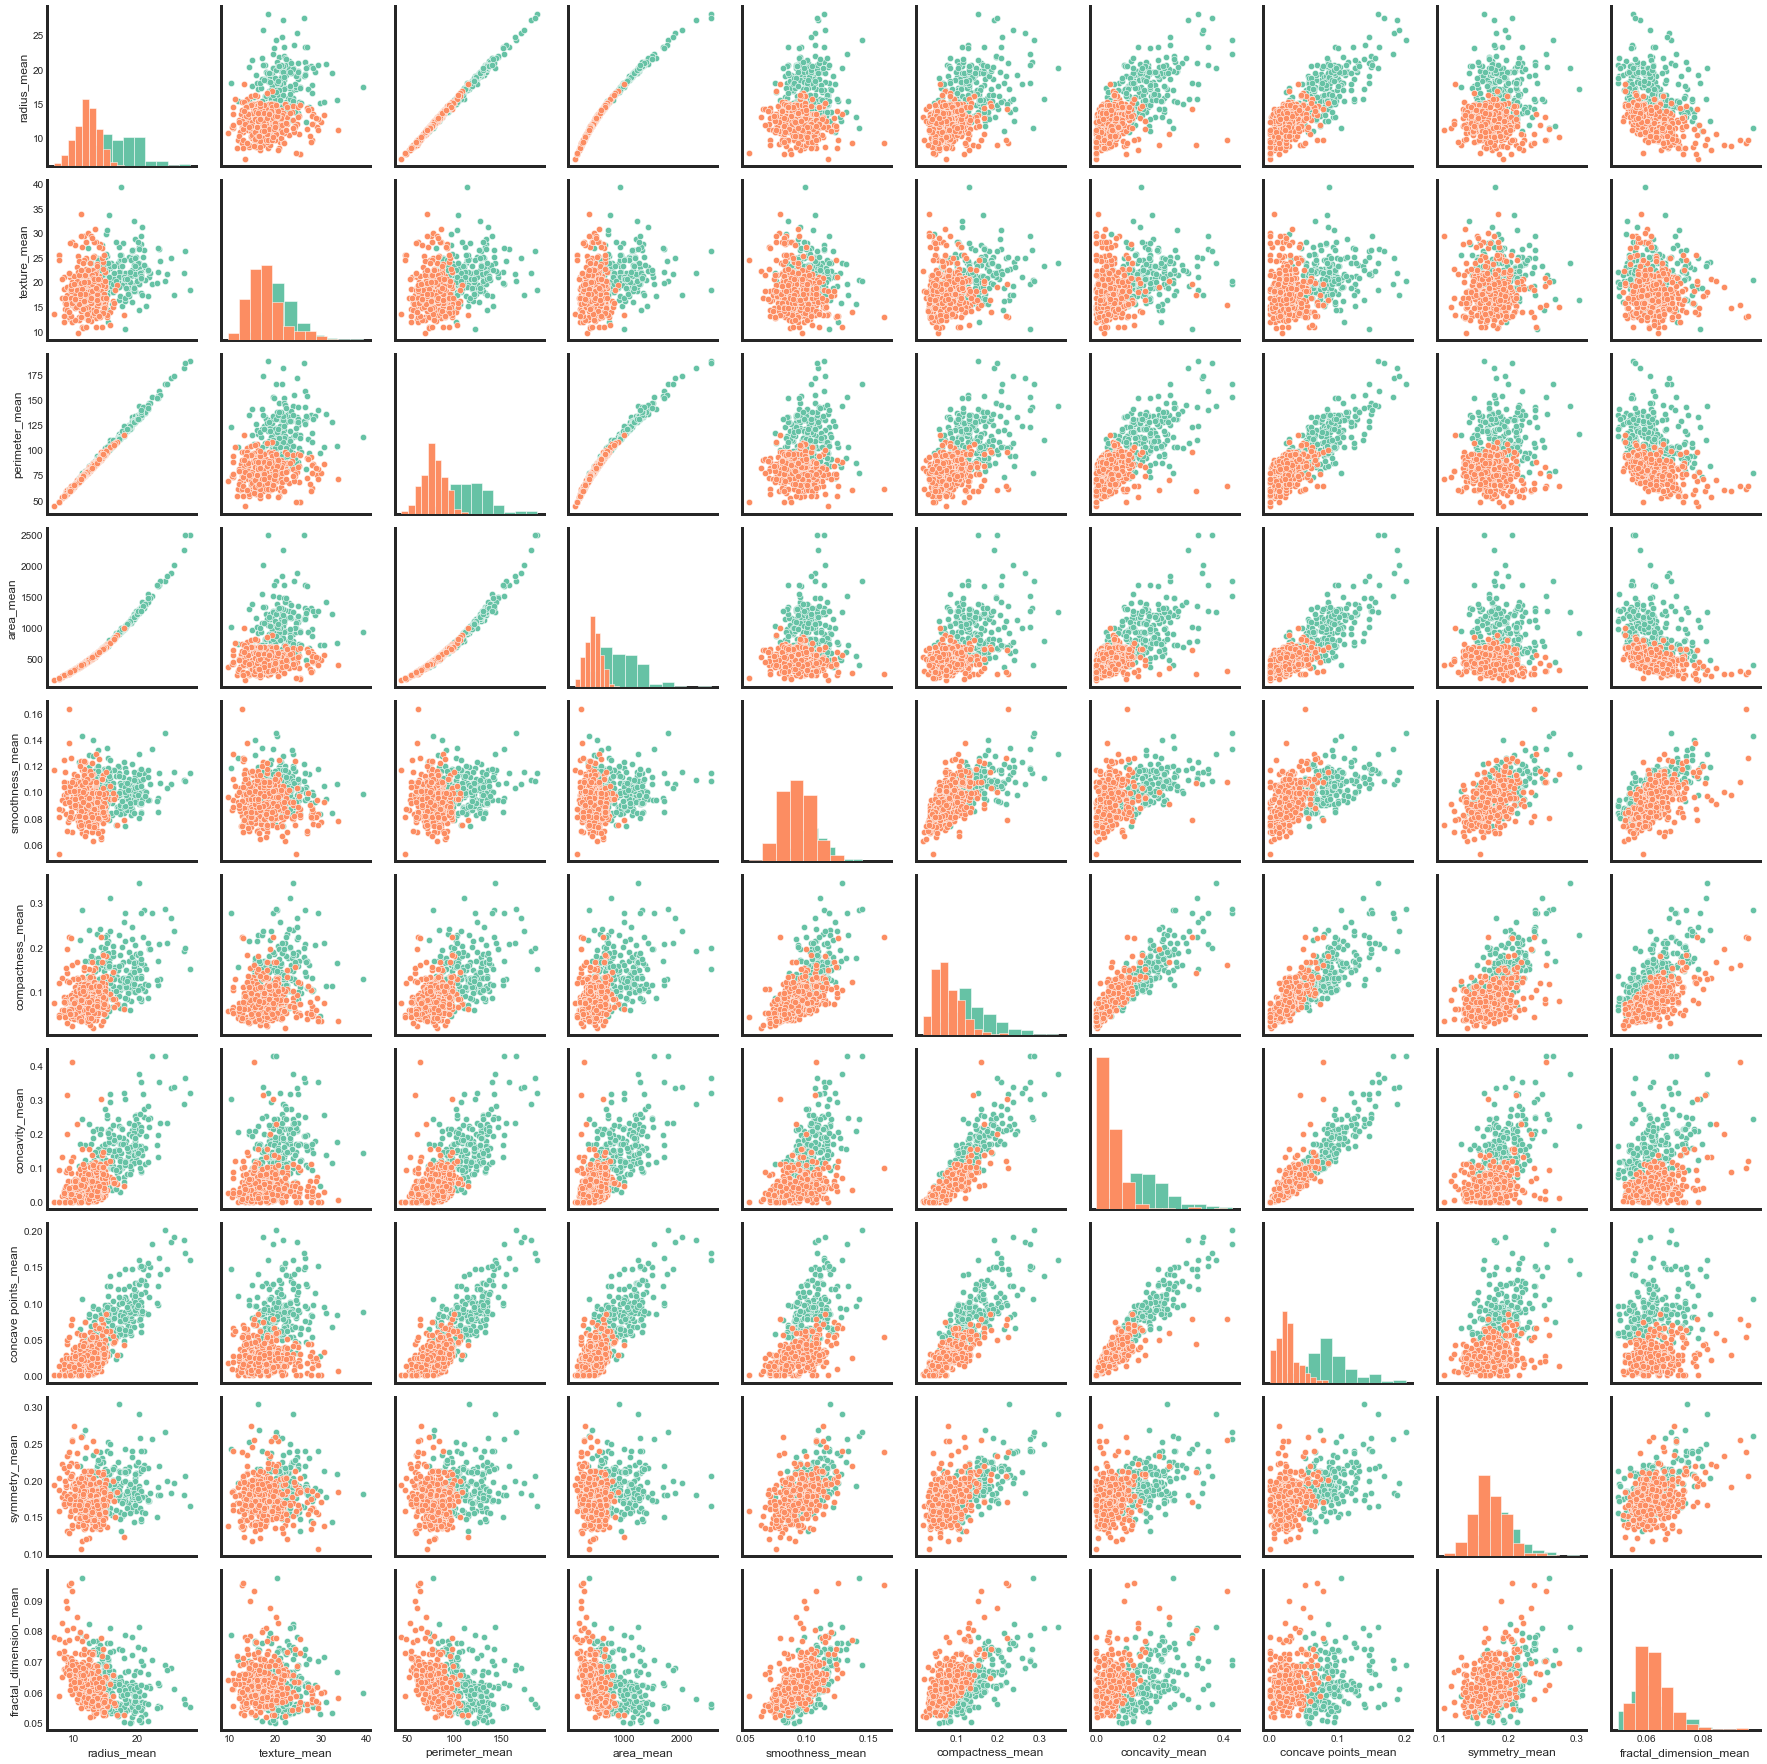

In [50]:

%matplotlib inline

g = sns.PairGrid(data.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

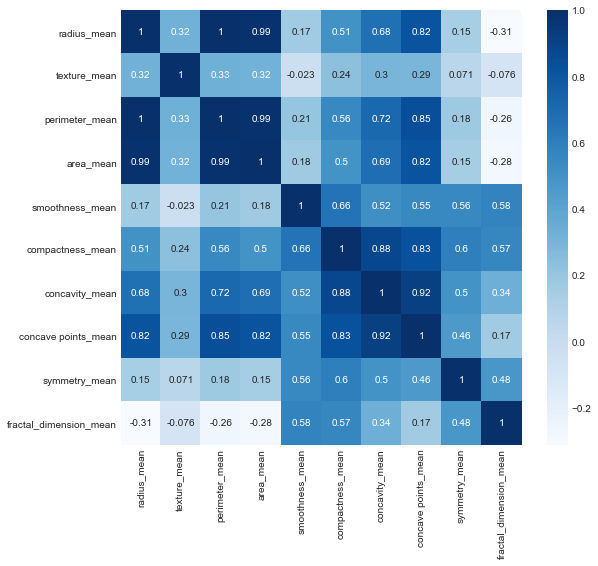

In [52]:
df_corr = data.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

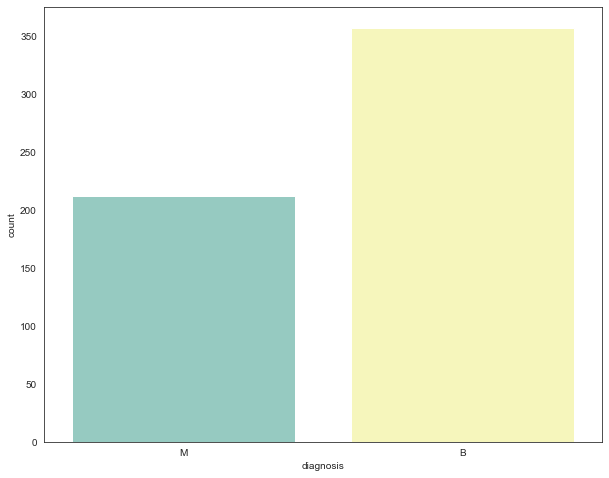

In [15]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set3")

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

In [19]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,1:31]
y = array[:,0]


In [20]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Call the transform method of LabelEncorder on two dummy variables
#le.transform (['M', 'B'])

In [21]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [23]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

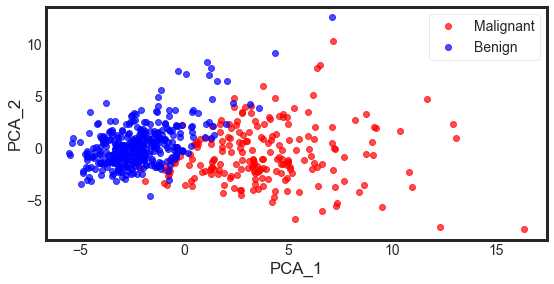

In [24]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [25]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

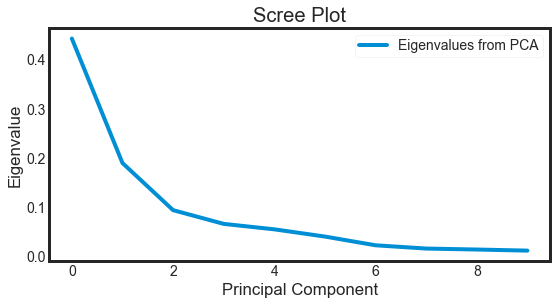

In [28]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'



In [31]:
# 5. Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.95



In [33]:
# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



In [35]:
from sklearn.feature_selection import SelectKBest, f_regression
clf2 = make_pipeline(SelectKBest(f_regression, k=3),SVC(probability=True))

scores = cross_val_score(clf2, Xs, y, cv=3)

# Get average of 3-fold cross-validation score using an SVC estimator.
n_folds = 3
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 3-fold cross-validation accuracy score for this classifier is 0.97



In [38]:
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

[0.93157895 0.95263158 0.94179894]
Average score and uncertainty: (94.20 +- 0.496)%


In [39]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

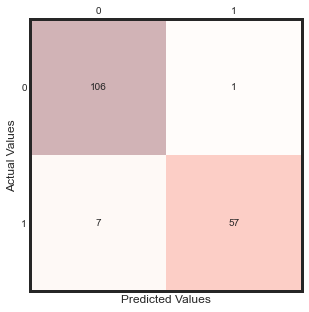

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

In [42]:


from sklearn.model_selection import GridSearchCV
# Train classifiers.
kernel_values = [ 'linear' ,  'poly' ,  'rbf' ,  'sigmoid' ]
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_values}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [43]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} with a score of 0.98


In [44]:
grid.best_estimator_.probability = True
clf = grid.best_estimator_

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



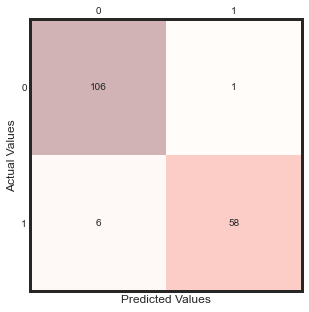

In [45]:

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()


In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(X_train, y_train, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain = X_train[:, :2] # we only take the first two features.

#================================================================
# Create color maps
#================================================================
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


#================================================================
# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors
#================================================================

C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(Xtrain, y_train)

In [47]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # create a mesh to plot in
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']



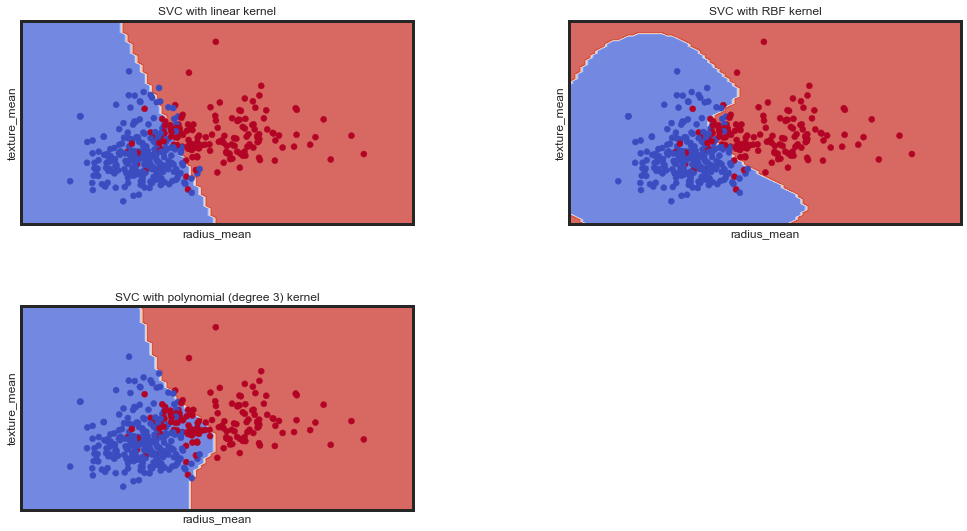

In [48]:
for i, clf in enumerate((svm, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    # Create classifier.
    clf = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

    # Fit the classifier on the training features and labels.
    clf.fit(X_train, y_train)

    # Make predictions.
    predictions = clf.predict(X_test)
    # Evaluate the model.
    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(y_test, predictions))

print_ml_results()


Report:

Accuracy: 0.9532163742690059

               precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171

[[107   0]
 [  8  56]]


In [61]:
from sklearn.tree import DecisionTreeClassifier;

tree = DecisionTreeClassifier(criterion    =  'entropy',
                              max_depth    =  3,
                              random_state =  0 );
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(208.79999999999998, 190.26, 'X[7] <= 0.065\nentropy = 0.952\nsamples = 398\nvalue = [250, 148]'),
 Text(125.28, 135.9, 'X[23] <= 0.154\nentropy = 0.229\nsamples = 242\nvalue = [233, 9]'),
 Text(83.52, 81.53999999999999, 'X[1] <= 0.532\nentropy = 0.147\nsamples = 238\nvalue = [233, 5]'),
 Text(41.76, 27.180000000000007, 'entropy = 0.0\nsamples = 193\nvalue = [193, 0]'),
 Text(125.28, 27.180000000000007, 'entropy = 0.503\nsamples = 45\nvalue = [40, 5]'),
 Text(167.04, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(292.32, 135.9, 'X[22] <= 0.214\nentropy = 0.497\nsamples = 156\nvalue = [17, 139]'),
 Text(250.56, 81.53999999999999, 'X[21] <= -0.315\nentropy = 0.992\nsamples = 38\nvalue = [17, 21]'),
 Text(208.79999999999998, 27.180000000000007, 'entropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(292.32, 27.180000000000007, 'entropy = 0.439\nsamples = 22\nvalue = [2, 20]'),
 Text(334.08, 81.53999999999999, 'entropy = 0.0\nsamples = 118\nvalue = [0, 118]')

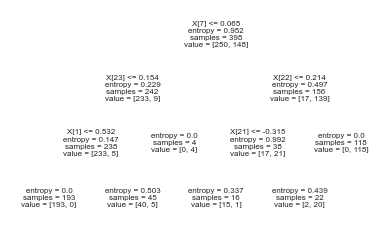

In [70]:
from sklearn.tree import plot_tree;

plot_tree(tree,
          fontsize      = 8 )

In [72]:
from sklearn.metrics import accuracy_score;
y_pred_train = tree.predict(X_train);
print("Train Set Accuracy : ", accuracy_score(y_train, y_pred_train))
y_pred_test = tree.predict(X_test);
print("Test Set Accuracy  : ", accuracy_score(y_test, y_pred_test))

Train Set Accuracy :  0.9798994974874372
Test Set Accuracy  :  0.9239766081871345


In [73]:

# GINI IMPURITY
tree_gin_d1 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  1,
                                     random_state =  0 );
tree_gin_d1.fit(X_train, y_train)

y_pred_train_gin_d1 = tree_gin_d1.predict(X_train);
y_pred_test_gin_d1  = tree_gin_d1.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d1 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  1,
                                     random_state =  0 );
tree_ent_d1.fit(X_train, y_train)

y_pred_train_ent_d1 = tree_ent_d1.predict(X_train);
y_pred_test_ent_d1  = tree_ent_d1.predict(X_test);


In [74]:
# GINI IMPURITY
tree_gin_d2 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  2,
                                     random_state =  0);
tree_gin_d2.fit(X_train, y_train)

y_pred_train_gin_d2 = tree_gin_d2.predict(X_train);
y_pred_test_gin_d2  = tree_gin_d2.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d2 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  2,
                                     random_state =  0 );
tree_ent_d2.fit(X_train, y_train)

y_pred_train_ent_d2 = tree_ent_d2.predict(X_train);
y_pred_test_ent_d2  = tree_ent_d2.predict(X_test);

In [75]:
# GINI IMPURITY
tree_gin_d3 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  3,
                                     random_state =  0 );
tree_gin_d3.fit(X_train, y_train)

y_pred_train_gin_d3 = tree_gin_d3.predict(X_train);
y_pred_test_gin_d3  = tree_gin_d3.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d3 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  3,
                                     random_state =  0 );
tree_ent_d3.fit(X_train, y_train)

y_pred_train_ent_d3 = tree_ent_d3.predict(X_train);
y_pred_test_ent_d3  = tree_ent_d3.predict(X_test);

In [76]:
# GINI IMPURITY
tree_gin_d4 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  4,
                                     random_state =  0 );
tree_gin_d4.fit(X_train, y_train)

y_pred_train_gin_d4 = tree_gin_d4.predict(X_train);
y_pred_test_gin_d4  = tree_gin_d4.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d4 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  4,
                                     random_state =  0 );
tree_ent_d4.fit(X_train, y_train)

y_pred_train_ent_d4 = tree_ent_d4.predict(X_train);
y_pred_test_ent_d4  = tree_ent_d4.predict(X_test);

In [77]:
# GINI IMPURITY
tree_gin_d5 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  5,
                                     random_state =  0 );
tree_gin_d5.fit(X_train, y_train)

y_pred_train_gin_d5 = tree_gin_d5.predict(X_train);
y_pred_test_gin_d5  = tree_gin_d5.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d5 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  5,
                                     random_state =  0 );
tree_ent_d5.fit(X_train, y_train)

y_pred_train_ent_d5 = tree_ent_d5.predict(X_train);
y_pred_test_ent_d5  = tree_ent_d5.predict(X_test);

In [78]:
# GINI IMPURITY
tree_gin_d6 = DecisionTreeClassifier(criterion    =  'gini',
                                     max_depth    =  6,
                                     random_state =  0 );
tree_gin_d6.fit(X_train, y_train)

y_pred_train_gin_d6 = tree_gin_d6.predict(X_train);
y_pred_test_gin_d6  = tree_gin_d6.predict(X_test);


# ENTROPY IMPURITY
tree_ent_d6 = DecisionTreeClassifier(criterion    =  'entropy',
                                     max_depth    =  6,
                                     random_state =  0 );
tree_ent_d6.fit(X_train, y_train)

y_pred_train_ent_d6 = tree_ent_d6.predict(X_train);
y_pred_test_ent_d6  = tree_ent_d6.predict(X_test);

In [79]:
print("\r\nDEPTH = 1");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d1));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d1));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d1));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d1));

print("\r\nDEPTH = 2");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d2));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d2));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d2));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d2));

print("\r\nDEPTH = 3");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d3));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d3));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d3));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d3));

print("\r\nDEPTH = 4");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d4));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d4));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d4));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d4));

print("\r\nDEPTH = 5");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d5));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d5));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d5));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d5));

print("\r\nDEPTH = 6");
print("\tGINI : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_gin_d6));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_gin_d6));
print("\tENTROPY : ");
print("\t\tTrain Set Accuracy : ", accuracy_score(y_train, y_pred_train_ent_d6));
print("\t\tTest Set Accuracy  : ", accuracy_score(y_test, y_pred_test_ent_d6));


DEPTH = 1
	GINI : 
		Train Set Accuracy :  0.9346733668341709
		Test Set Accuracy  :  0.8713450292397661
	ENTROPY : 
		Train Set Accuracy :  0.9346733668341709
		Test Set Accuracy  :  0.8713450292397661

DEPTH = 2
	GINI : 
		Train Set Accuracy :  0.9623115577889447
		Test Set Accuracy  :  0.9005847953216374
	ENTROPY : 
		Train Set Accuracy :  0.9447236180904522
		Test Set Accuracy  :  0.8830409356725146

DEPTH = 3
	GINI : 
		Train Set Accuracy :  0.9798994974874372
		Test Set Accuracy  :  0.935672514619883
	ENTROPY : 
		Train Set Accuracy :  0.9798994974874372
		Test Set Accuracy  :  0.9239766081871345

DEPTH = 4
	GINI : 
		Train Set Accuracy :  0.992462311557789
		Test Set Accuracy  :  0.9181286549707602
	ENTROPY : 
		Train Set Accuracy :  0.9824120603015075
		Test Set Accuracy  :  0.935672514619883

DEPTH = 5
	GINI : 
		Train Set Accuracy :  0.992462311557789
		Test Set Accuracy  :  0.9298245614035088
	ENTROPY : 
		Train Set Accuracy :  0.992462311557789
		Test Set Accuracy  :  0.92

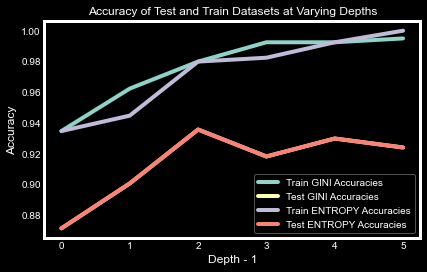

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")
fig = plt.figure();
ax  = plt.axes();
ax.set_xlabel('Depth - 1');
ax.set_ylabel('Accuracy');
ax.set_title('Accuracy of Test and Train Datasets at Varying Depths');

train_gin_accuracy_lst = [accuracy_score(y_train, y_pred_train_gin_d1),
                          accuracy_score(y_train, y_pred_train_gin_d2),
                          accuracy_score(y_train, y_pred_train_gin_d3),
                          accuracy_score(y_train, y_pred_train_gin_d4),
                          accuracy_score(y_train, y_pred_train_gin_d5),
                          accuracy_score(y_train, y_pred_train_gin_d6)];

test_gin_accuracy_lst  = [accuracy_score(y_test, y_pred_test_gin_d1), 
                         accuracy_score(y_test, y_pred_test_gin_d2), 
                         accuracy_score(y_test, y_pred_test_gin_d3), 
                         accuracy_score(y_test, y_pred_test_gin_d4), 
                         accuracy_score(y_test, y_pred_test_gin_d5), 
                         accuracy_score(y_test, y_pred_test_gin_d6)];

train_ent_accuracy_lst = [accuracy_score(y_train, y_pred_train_ent_d1),
                          accuracy_score(y_train, y_pred_train_ent_d2),
                          accuracy_score(y_train, y_pred_train_ent_d3),
                          accuracy_score(y_train, y_pred_train_ent_d4),
                          accuracy_score(y_train, y_pred_train_ent_d5),
                          accuracy_score(y_train, y_pred_train_ent_d6)];

test_ent_accuracy_lst  = [accuracy_score(y_test, y_pred_test_ent_d1), 
                         accuracy_score(y_test, y_pred_test_ent_d2), 
                         accuracy_score(y_test, y_pred_test_ent_d3), 
                         accuracy_score(y_test, y_pred_test_ent_d4), 
                         accuracy_score(y_test, y_pred_test_ent_d5), 
                         accuracy_score(y_test, y_pred_test_ent_d6)];

plt.plot(train_gin_accuracy_lst, label  =  "Train GINI Accuracies");
plt.plot(test_gin_accuracy_lst, label   =  "Test GINI Accuracies");

plt.plot(train_ent_accuracy_lst, label  =  "Train ENTROPY Accuracies");
plt.plot(test_gin_accuracy_lst, label   =  "Test ENTROPY Accuracies");

plt.legend(loc = "lower right", frameon =  True);